Chapter 12: Stochastics

In [1]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
#Fixes the seed value for reproducibility and fixes the number of digits for print‐outs.
npr.seed(100) 
np.set_printoptions(precision=4)

In [ ]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [5]:
npr.rand(5,5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [6]:
a =5.
b=10.
npr.rand(10)*(b-a)+a 


array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [7]:
npr.rand(5,5)*(b-a)+a

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

In [8]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0, 10, sample_size)
rn3 = npr.sample(size=sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

Text(0.5, 1.0, 'choice')

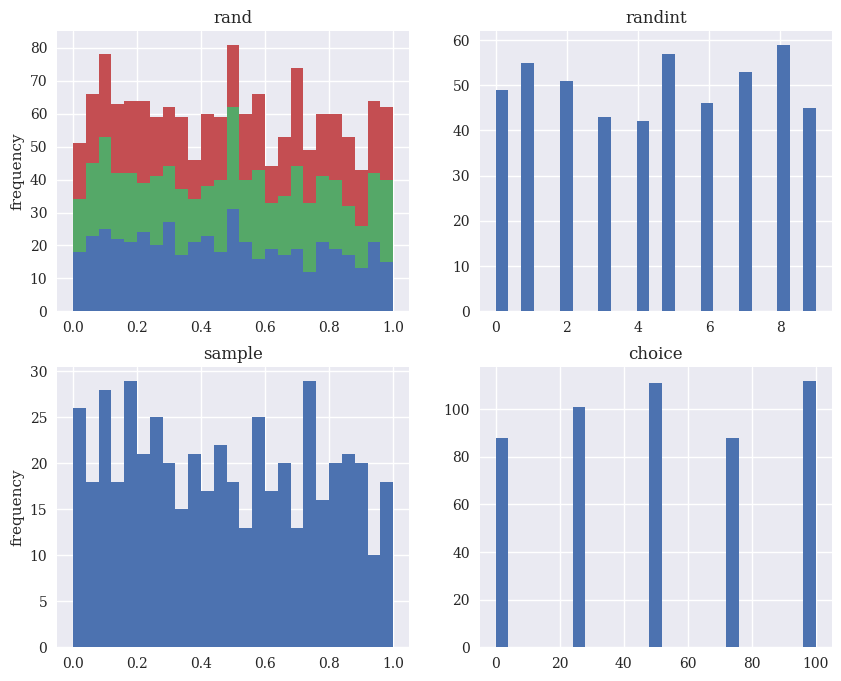

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
 figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice')

Figure 12-1. Histograms of simple random numbers

In [11]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size) 

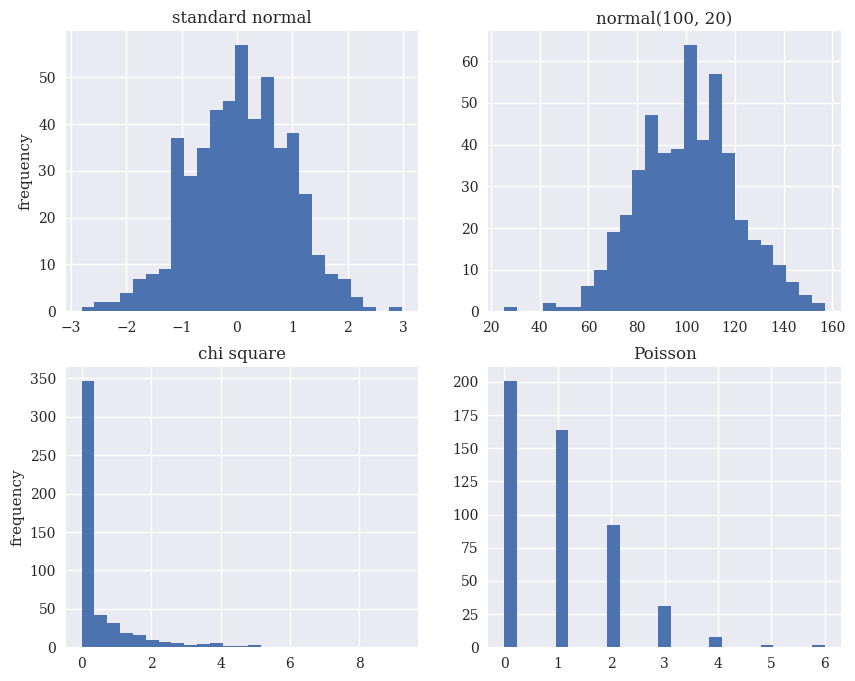

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
 figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson');

Figure 12-2. Histograms of random samples for different distributions

Figure 12-2 shows the results for the three continuous distributions and the discrete
one (Poisson). The Poisson distribution is used, for example, to simulate the arrival
of (rare) external events, like a jump in the price of an instrument or an exogenic
shock. 

In [13]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
sigma * math.sqrt(T) * npr.standard_normal(I)) 

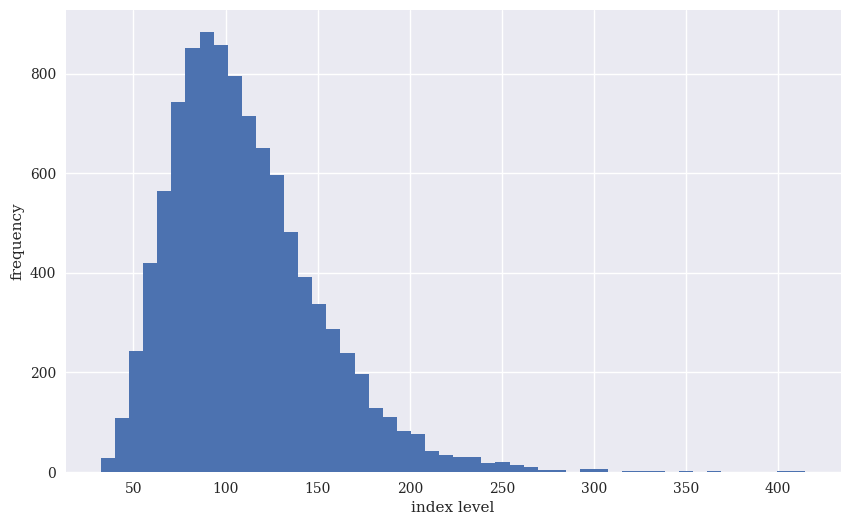

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

Figure 12-3. Statically simulated geometric Brownian motion (via npr.standard_normal())

In [15]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
 sigma * math.sqrt(T), size=I) 

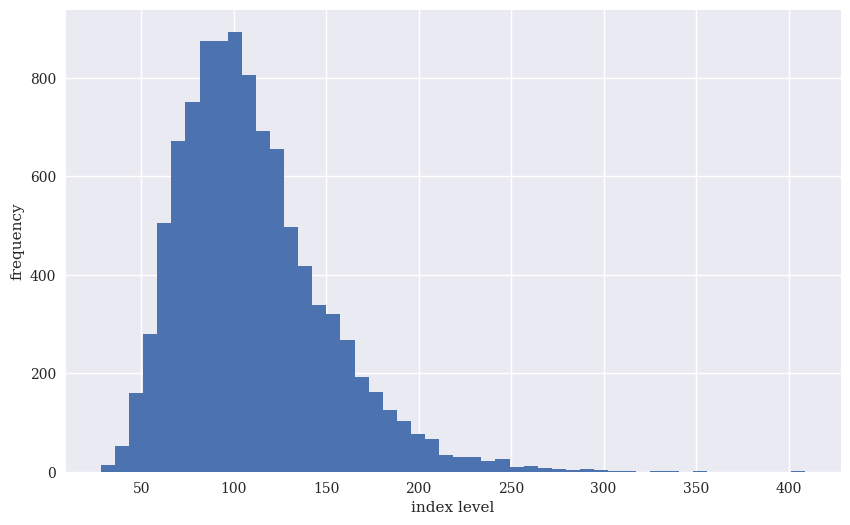

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

Figure 12-4. Statically simulated geometric Brownian motion (via npr.lognormal())

In [17]:
import scipy.stats as scs

In [ ]:
def print_statistics(a1, a2):
    ''' Prints selected statistics.
    Parameters
    ==========
    a1, a2: ndarray objects
    results objects from simulation
    '''
    sta1 = scs.describe(a1) #The scs.describe() function gives back important statistics for a data set.
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]),np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [20]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.327         28.230
           max        414.825        409.110
          mean        110.730        110.431
           std         40.300         39.878
          skew          1.122          1.115
      kurtosis          2.438          2.217


In [21]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
    sigma * math.sqrt(dt) * npr.standard_normal(I)) 

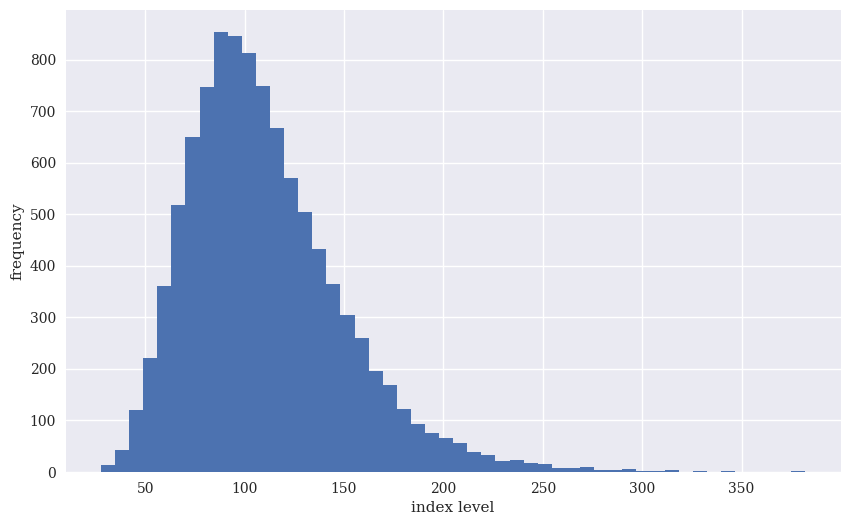

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

Figure 12-5. Dynamically simulated geometric Brownian motion at maturity

In [23]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.746         28.230
           max        382.096        409.110
          mean        110.423        110.431
           std         39.179         39.878
          skew          1.069          1.115
      kurtosis          2.028          2.217


Text(0, 0.5, 'index level')

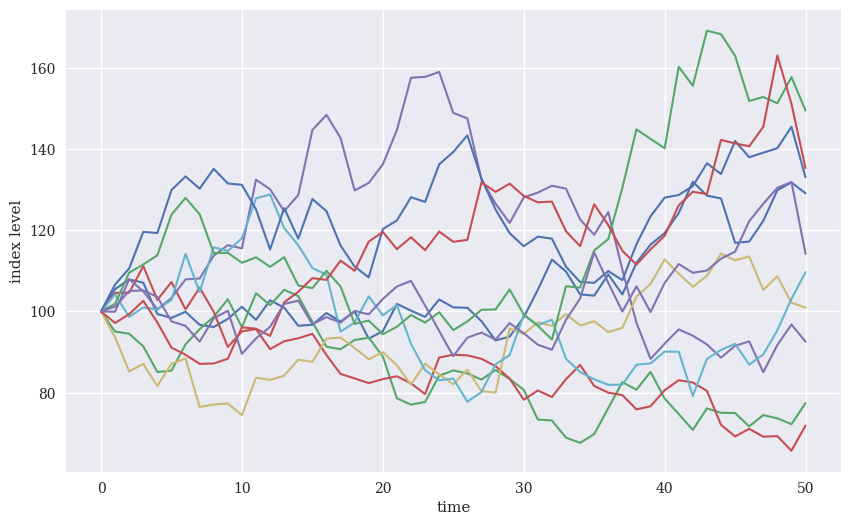

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

Figure 12-6. Dynamically simulated geometric Brownian motion paths

In [25]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1
I = 10000
M = 50
dt = T / M

In [26]:
def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1] +kappa * (theta - np.maximum(xh[t - 1], 0)) * dt +
 sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * math.sqrt(dt) * npr.standard_normal(I))
    x = np.maximum(xh, 0)
    return x
x1 = srd_euler()

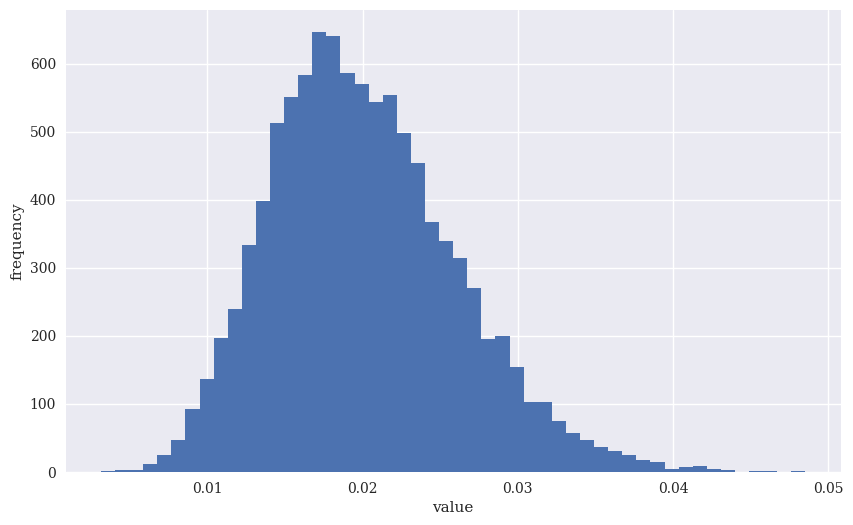

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency');

Figure 12-7. Dynamically simulated square-root diffusion at maturity (Euler scheme)

Text(0, 0.5, 'index level')

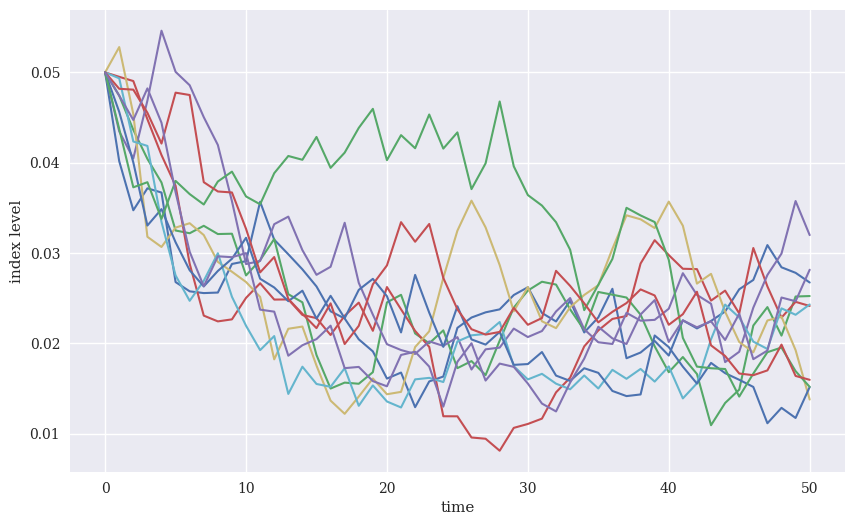

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

Figure 12-8. Dynamically simulated square-root diffusion paths (Euler scheme)

In [30]:
def srd_exact():
    x = np.zeros((M + 1, I))
    x[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x[t - 1]
        x[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x
x2 = srd_exact()

Text(0, 0.5, 'frequency')

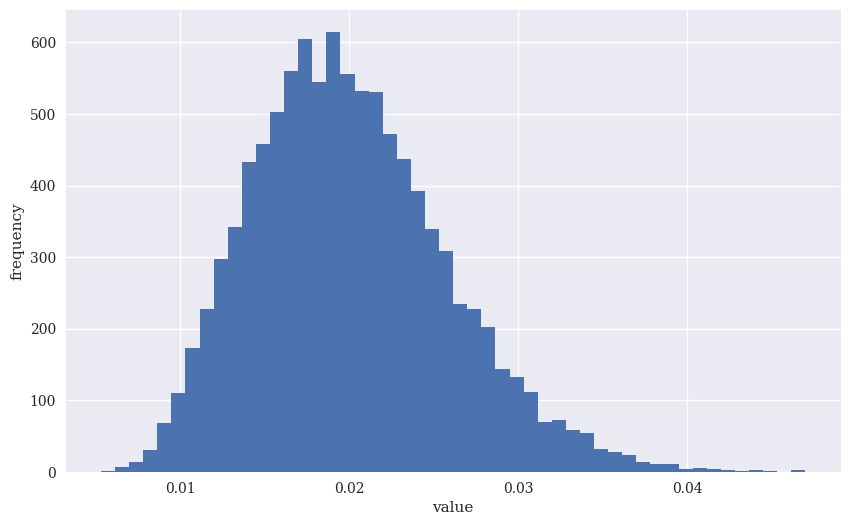

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Figure 12-9. Dynamically simulated square-root diffusion at maturity (exact scheme)

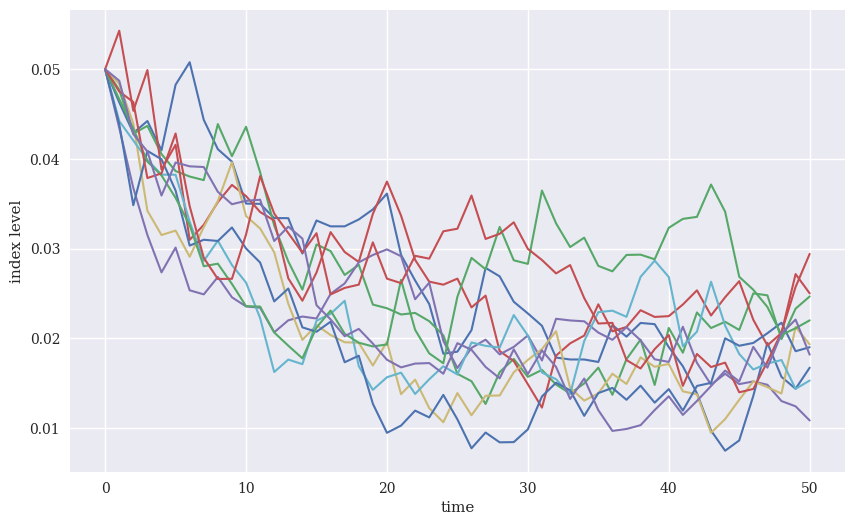

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

Figure 12-10. Dynamically simulated square-root diffusion paths (exact scheme)

In [33]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.003          0.005
           max          0.049          0.047
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.529          0.532
      kurtosis          0.289          0.273


In [37]:
I = 250000
%time x1 = srd_euler()

CPU times: total: 562 ms
Wall time: 567 ms


In [38]:
%time x2 = srd_exact()

CPU times: total: 672 ms
Wall time: 703 ms


In [36]:
print_statistics(x1[-1], x2[-1])
x1 = 0.0; x2=0.0

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.002          0.003
           max          0.071          0.055
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.563          0.579
      kurtosis          0.492          0.520


In [ ]:
S0 = 100.
r = 0.05
v0 = 0.1 #Initial (instantaneous) volatility value.
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6 #Fixed correlation between the two Brownian motions.
T = 1.0

In [40]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat) 

In [41]:
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [ ]:
M = 50
I = 10000
dt = T / M

In [42]:
ran_num = npr.standard_normal((2, M + 1, I))

In [43]:
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)

In [44]:
v[0] = v0
vh[0] = v0

In [ ]:
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :]) #Picks out the relevant random number subset and transforms it via the Cholesky matrix.
    vh[t] = (vh[t - 1] +
    kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
    sigma * np.sqrt(np.maximum(vh[t - 1], 0)) *
    math.sqrt(dt) * ran[1]) #Simulates the paths based on an Euler scheme.

In [46]:
v = np.maximum(vh, 0)

In [47]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

Text(0.5, 0, 'volatility')

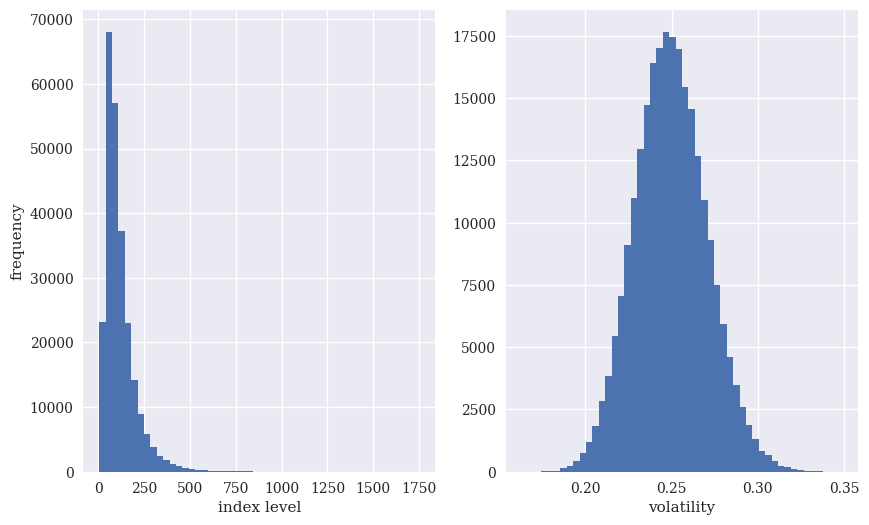

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')

Figure 12-11. Dynamically simulated stochastic volatility process at maturity

In [49]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          3.685          0.163
           max       1752.005          0.349
          mean        117.154          0.250
           std         90.435          0.021
          skew          2.879          0.159
      kurtosis         16.478          0.029


Text(0, 0.5, 'volatility')

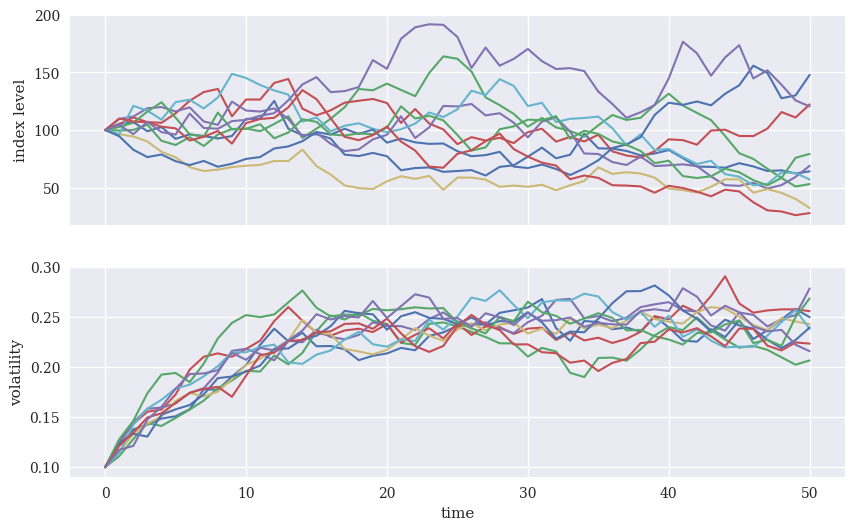

In [50]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
 figsize=(10, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')

Figure 12-12. Dynamically simulated stochastic volatility process paths

In [ ]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75 #The jump intensity.
mu = -0.6 #The mean jump size.
delta = 0.25 #The jump volatility.
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1) #The drift correction.

In [52]:
T = 1.0
M = 50
I = 10000
dt = T / M

In [54]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt +
     sigma * math.sqrt(dt) * sn1[t]) +
     (np.exp(mu + delta * sn2[t]) - 1) *
     poi[t])
    S[t] = np.maximum(S[t], 0)

Text(0, 0.5, 'frequency')

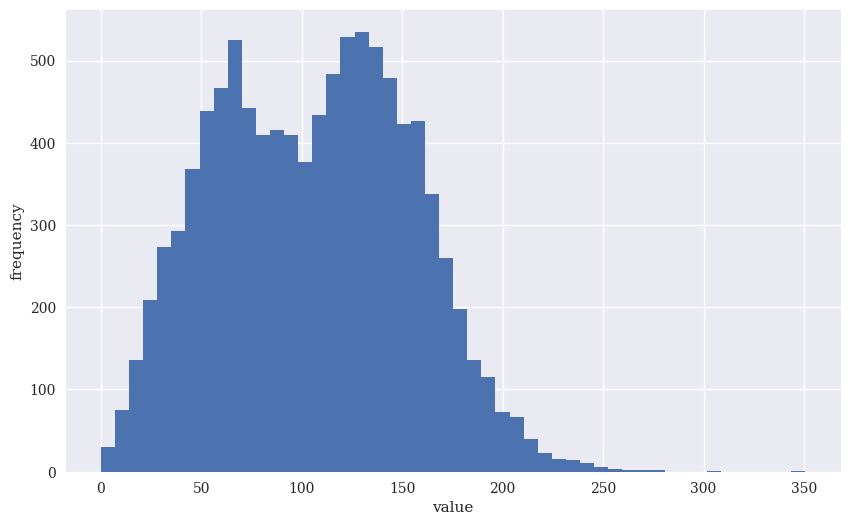

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Figure 12-13. Dynamically simulated jump diffusion process at maturity

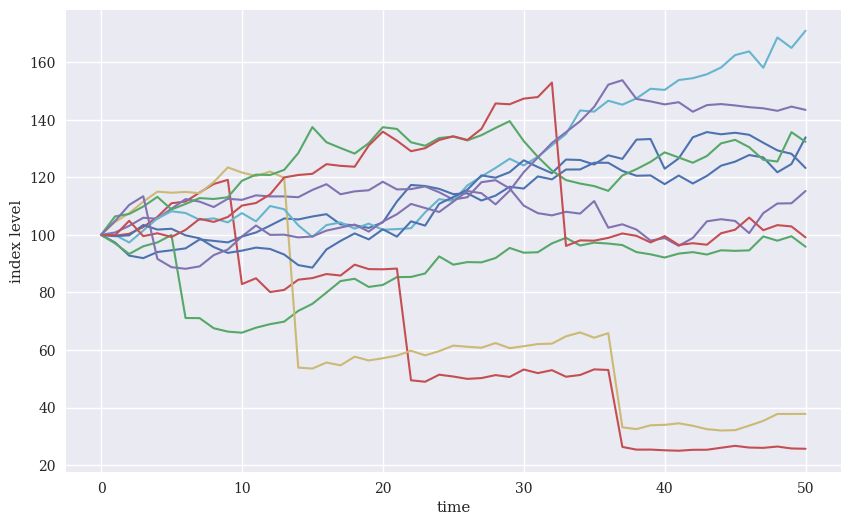

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

Figure 12-14. Dynamically simulated jump diffusion process paths

In [57]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * '-')
for i in range(1, 31, 2):
    npr.seed(100)
    sn = npr.standard_normal(i ** 2 * 10000)
    print('%15.12f %15.12f' % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.001150944833  1.006296354600
 0.002841204001  0.995987967146
 0.001998082016  0.997701714233
 0.001322322067  0.997771186968
 0.000592711311  0.998388962646
-0.000339730751  0.998399891450
-0.000228109010  0.998657429396
 0.000295768719  0.998877333340
 0.000257107789  0.999284894532
-0.000357870642  0.999456401088
-0.000528443742  0.999617831131
-0.000300171536  0.999445228838
-0.000162924037  0.999516059328
 0.000135778889  0.999611052522
 0.000182006048  0.999619405229


In [58]:
i**2*10000

8410000

In [59]:
sn = npr.standard_normal(int(10000 / 2))
sn = np.concatenate((sn, -sn)) 

In [60]:
np.shape(sn)

(10000,)

In [ ]:
sn.mean()

np.float64(0.0)

In [62]:
print('%15s %15s' % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
 0.000000000000  1.000413716783
 0.000000000000  1.002925061201
 0.000000000000  1.000755212673
 0.000000000000  1.001636910076
 0.000000000000  1.000726758438
 0.000000000000  1.001621265149
 0.000000000000  1.001203722778
 0.000000000000  1.000556669784
 0.000000000000  1.000113464185
 0.000000000000  0.999435175324
 0.000000000000  0.999356961431
 0.000000000000  0.999641436845
 0.000000000000  0.999642768905
 0.000000000000  0.999638303451


In [ ]:
sn = npr.standard_normal(10000)

In [64]:
sn.mean()

np.float64(-0.0011659982951624961)

In [65]:
sn.std()

np.float64(0.991255920204605)

In [ ]:
sn_new = (sn - sn.mean()) / sn.std()
#Corrects both the first and second moment in a single step.

In [67]:
 sn_new.mean()

np.float64(-2.4158453015843405e-17)

In [68]:
sn_new.std()

np.float64(0.9999999999999999)

In [69]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.
    Parameters
    ==========
    M: int
    number of time intervals for discretization
    I: int
    number of paths to be simulated
    anti_paths: boolean
    use of antithetic variates
    mo_math: boolean
    use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

In [70]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000

In [72]:
def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton
     by Monte Carlo simulation (of index level at maturity)
     Parameters
     ==========
     K: float
     (positive) strike price of the option
     Returns
     =======
        C0: float
        estimated present value of European call option
        '''
    
    sn = gen_sn(1, I)
     # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * sn[1])
     # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)
     # calculate MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

In [73]:
gbm_mcs_stat(K=105.)

np.float64(10.044221852841922)

In [ ]:
#The number of time intervals for the discretization.
M = 50

In [75]:
def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton
 by Monte Carlo simulation (of index level paths)
 Parameters
 ==========
 K: float
 (positive) strike price of the option
 option : string
 type of the option to be valued ('call', 'put')
 Returns
 =======
 C0: float
 estimated present value of European call option
 '''
    
    dt = T / M
 # simulation of index level paths
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt
            + sigma * math.sqrt(dt) * sn[t])
 # case-based calculation of payoff
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
 # calculation of MCS estimator
    C0 = math.exp(-r * T) * np.mean(hT)
    return C0

In [76]:
gbm_mcs_dyna(K=110., option='call')

np.float64(7.950008525028437)

In [77]:
gbm_mcs_dyna(K=110., option='put')

np.float64(12.629934942682002)

In [78]:
!pip install bsm2-python

   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   --------------- ------------------------ 6.0/15.5 MB 39.3 MB/s eta 0:00:01
   ---------------------------------------  15.5/15.5 MB 46.4 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 43.5 MB/s  0:00:00
   ---------------------------------------- 0.0/578.3 kB ? eta -:--:--
   ---------------------------------------- 578.3/578.3 kB 40.6 MB/s  0:00:00

   ---------------------------------------- 0/2 [control]
   ---------------------------------------- 0/2 [control]
   ---------------------------------------- 0/2 [control]
   ---------------------------------------- 0/2 [control]
   ---------------------------------------- 0/2 [control]
   ---------------------------------------- 0/2 [control]
   ---------------------------------------- 0/2 [control]
   ---------------------------------------- 0/2 [control]
   ---------------------------------------- 0/2 [control]
   ----------------------

In [80]:
from bsm_functions import bsm_call_value

In [81]:
stat_res = []  
dyna_res = []  
anal_res = []  
k_list = np.arange(80., 120.1, 5.)  
np.random.seed(100)

In [82]:
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))  
    dyna_res.append(gbm_mcs_dyna(K))  
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))  

In [83]:
stat_res = np.array(stat_res)  
dyna_res = np.array(dyna_res)  
anal_res = np.array(anal_res)  

<Figure size 1000x600 with 0 Axes>

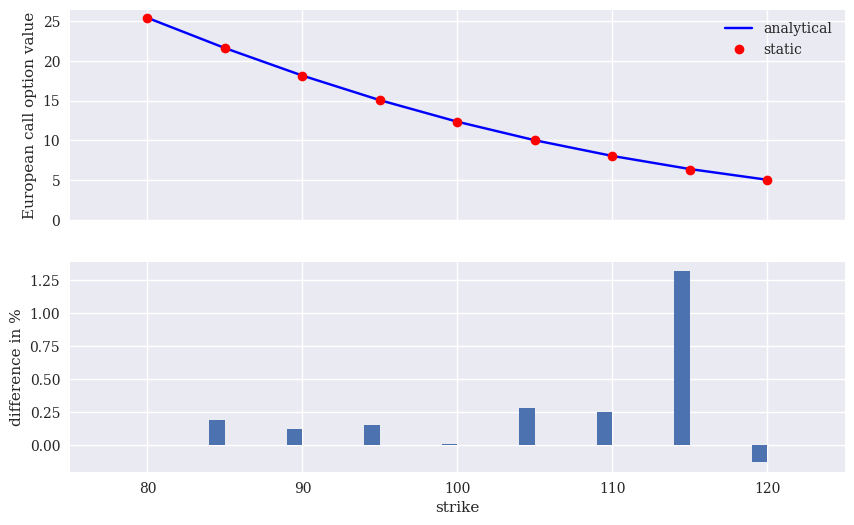

In [84]:
plt.figure(figsize=(10, 6))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125);

Figure 12-15. Analytical option values vs Monte Carlo estimators (static simulation)

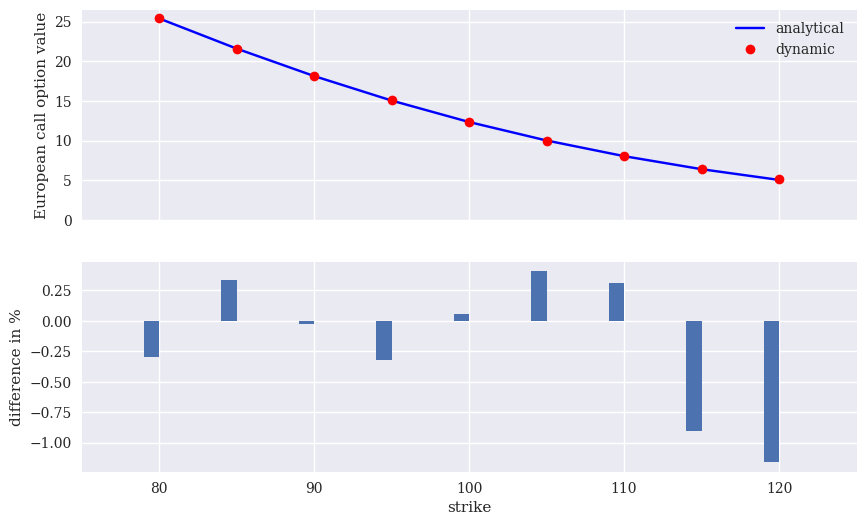

In [85]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.legend(loc=0)
ax1.set_ylim(bottom=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125);

Figure 12-16. Analytical option values vs. Monte Carlo estimators (dynamic simula‐tion)

In [86]:
def gbm_mcs_amer(K, option='call'):
    ''' Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    df = math.exp(-r * dt)
    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * math.sqrt(dt) * sn[t])
    # case based calculation of payoff
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    # LSM algorithm
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    # MCS estimator
    C0 = df * np.mean(V[1])
    return C0

In [87]:
gbm_mcs_amer(110., option='call')

np.float64(7.72170560630535)

In [88]:
gbm_mcs_amer(110., option='put')

np.float64(13.609997625418051)

In [89]:
euro_res = []
amer_res = []

In [90]:
k_list = np.arange(80., 120.1, 5.)

In [91]:
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))

In [92]:
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

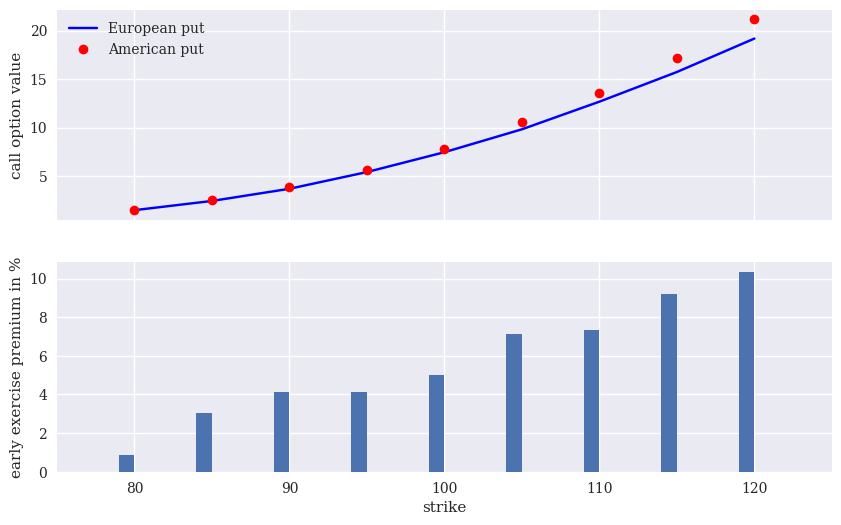

In [93]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value')
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125);

Figure 12-17. European vs. American Monte Carlo estimators

In [94]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000

In [ ]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
             sigma * np.sqrt(T) * npr.standard_normal(I))  
#Simulates end-of-period values for the geometric Brownian motion.

In [96]:
R_gbm = np.sort(ST - S0)  

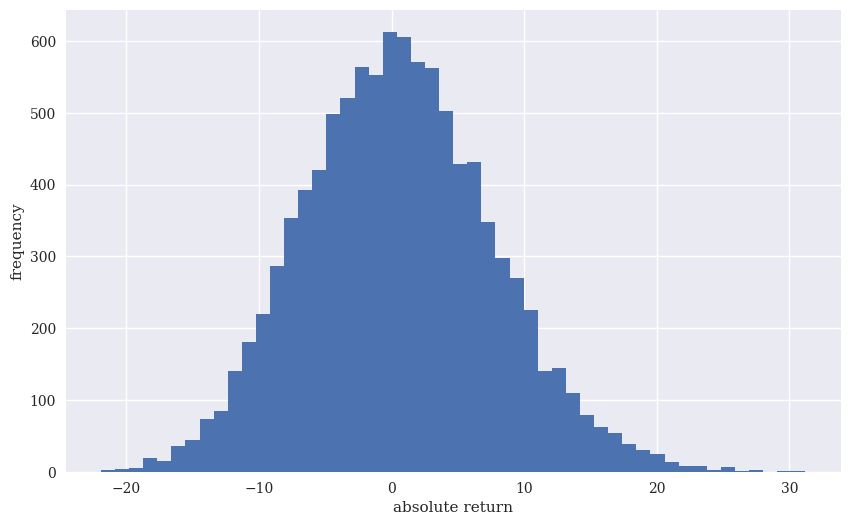

In [97]:
plt.figure(figsize=(10, 6))
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');

Figure 12-18. Absolute profits and losses from simulation (geometric Brownian motion)

In [98]:
import warnings
warnings.simplefilter('ignore')

In [99]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           21.814
           99.90           18.837
           99.00           15.230
           97.50           12.816
           95.00           10.824
           90.00            8.504


In [100]:
dt = 30. / 365 / M
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1)

In [101]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * math.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

In [102]:
R_jd = np.sort(S[-1] - S0)

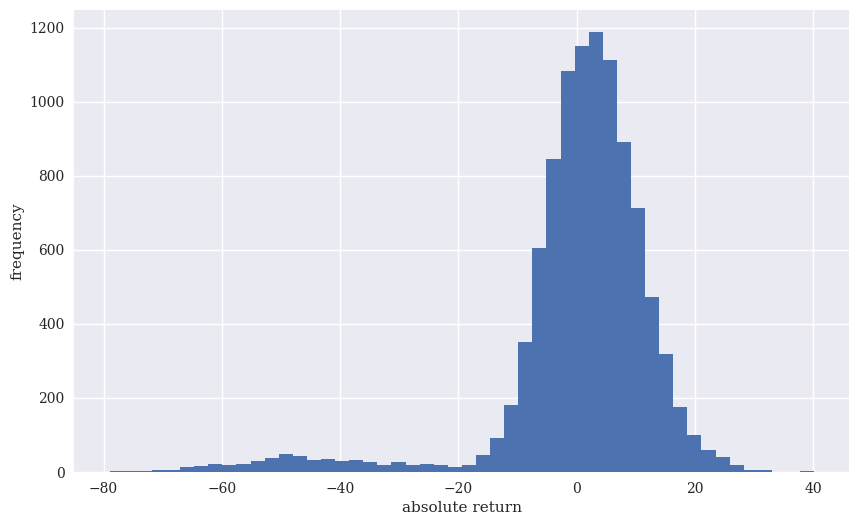

In [103]:
plt.figure(figsize=(10, 6))
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency');

Figure 12-19. Absolute profits and losses from simulation (jump diffusion)

In [104]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print('%16s %16s' % ('Confidence Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs, var):
    print('%16.2f %16.3f' % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           76.520
           99.90           69.396
           99.00           55.974
           97.50           46.405
           95.00           24.198
           90.00            8.836


In [105]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

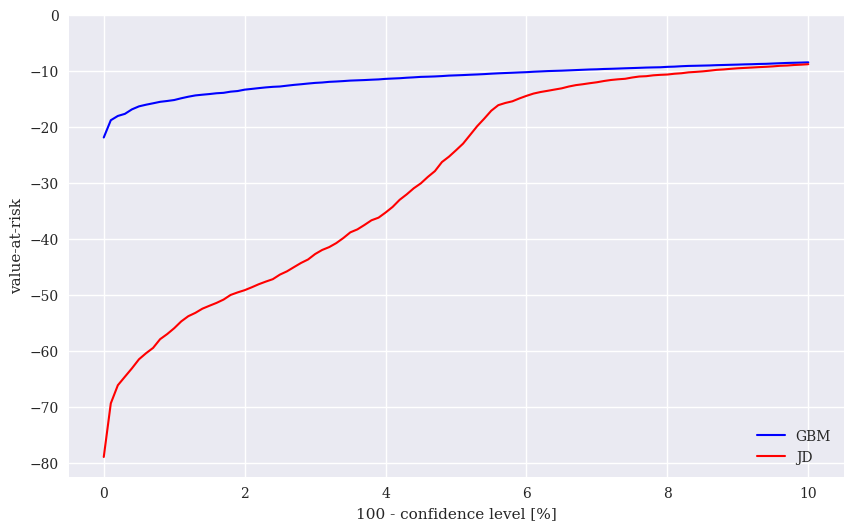

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.ylim(ymax=0.0);

Figure 12-20. Value-at-risk for geometric Brownian motion and jump diffusion

In [107]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

In [108]:
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

In [109]:
# Define loss level
L = 0.5  

In [110]:
# Defines the probability of default
p = 0.01  

In [111]:
# simulates defualt events
D = npr.poisson(p * T, I)  

In [112]:
# Limits defualts to one such event
D = np.where(D > 1, 1, D)  

In [113]:
# Discounted average simulated value of the asset at T
math.exp(-r*T)*np.mean(ST)

np.float64(99.94767178982691)

In [ ]:
CVaR = math.exp(-r * T) * np.mean(L * D * ST)  
CVaR 
# CVaR as the discounted average of the future losses in the case of a default

np.float64(0.4883560258963962)

In [115]:
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST)  
S0_CVA  
#Discounted average simulated value of the asset at T, adjusted for the simulated losses from default.


np.float64(99.45931576393053)

In [116]:
S0_adj = S0 - CVaR  
S0_adj  
# Current price of the asset adjusted by the simulated CVaR

np.float64(99.5116439741036)

In [ ]:
#Number of default events and therewith loss events.
np.count_nonzero(L * D * ST)  

np.int64(978)

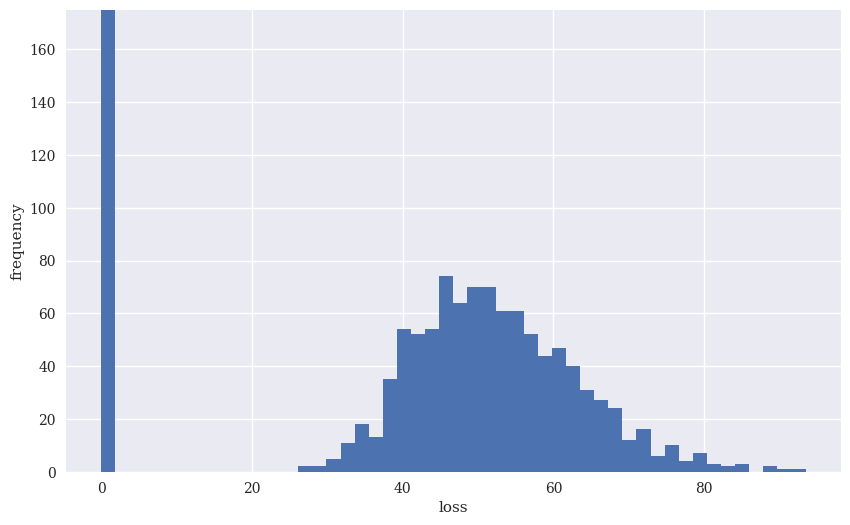

In [118]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * ST, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=175);

In [119]:
K = 100.
hT = np.maximum(ST - K, 0)

In [ ]:
#The Monte Carlo estimator value for the European call option.
C0 = math.exp(-r * T) * np.mean(hT)  
C0  

np.float64(10.396916492839354)

In [ ]:
#The CVaR as the discounted average of the future losses in the case of a default.
CVaR = math.exp(-r * T) * np.mean(L * D * hT)  
CVaR  

np.float64(0.05159099858923533)

In [122]:
#The Monte Carlo estimator value for the European call option, adjusted for the simulated losses from default.
C0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * hT)  
C0_CVA  

np.float64(10.34532549425012)

In [ ]:
#The number of losses due to default.
np.count_nonzero(L * D * hT)  

np.int64(538)

In [124]:
#The number of defaults.
np.count_nonzero(D)

np.int64(978)

In [125]:
#The number of cases for which the option expries
I - np.count_nonzero(hT)  

np.int64(44123)

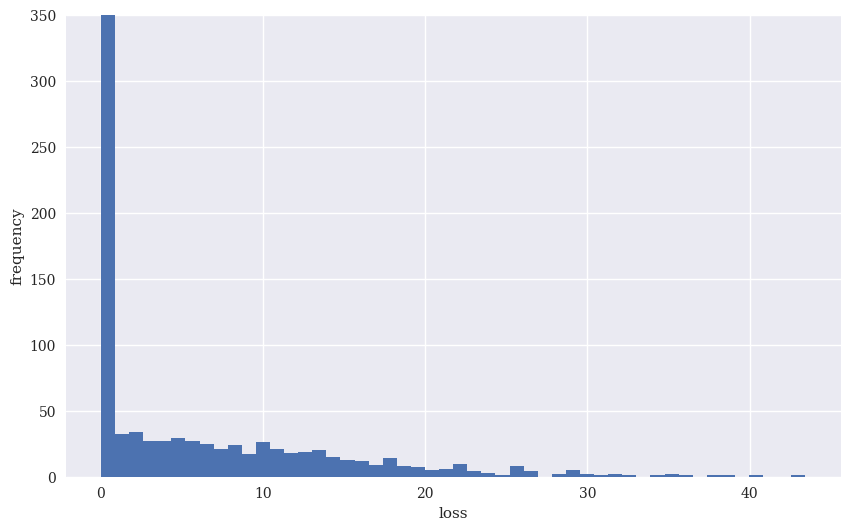

In [126]:
plt.figure(figsize=(10, 6))
plt.hist(L * D * hT, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.ylim(ymax=350);

Figure 12-22. Losses due to risk-neutrally expected default (call option)